In [1]:
from csoundengine import *

In [2]:
e = Engine()
s = e.session()

using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [3]:
s.defInstr('sine', r'''
|iamp=0.1, kfreq=1000|
a0 = oscili:a(iamp, lag:k(kfreq, 0.1))
a0 *= cossegr:a(0, 0.01, 1, 0.1, 0)
outch 1, a0
''')

Instr(sine, iamp=0.1, kfreq=1000)

In [4]:
ev = s.sched('sine', 0, 4, kfreq=442, iamp=0.2)
ev.set('kfreq', 800, delay=2)
ev

Button(description='Stop', style=ButtonStyle())

Output()

Synth(‖ sine=401.0002 start=2.099 dur=4 iamp=0.2 kfreq=442)

RenderJob(outfile='/home/em/dev/python/maelzel/notebooks/test/tmp/sine.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=<Popen: returncode: 0 args: ['/usr/local/bin/csound', '-o', '/home/em/dev/py...>)
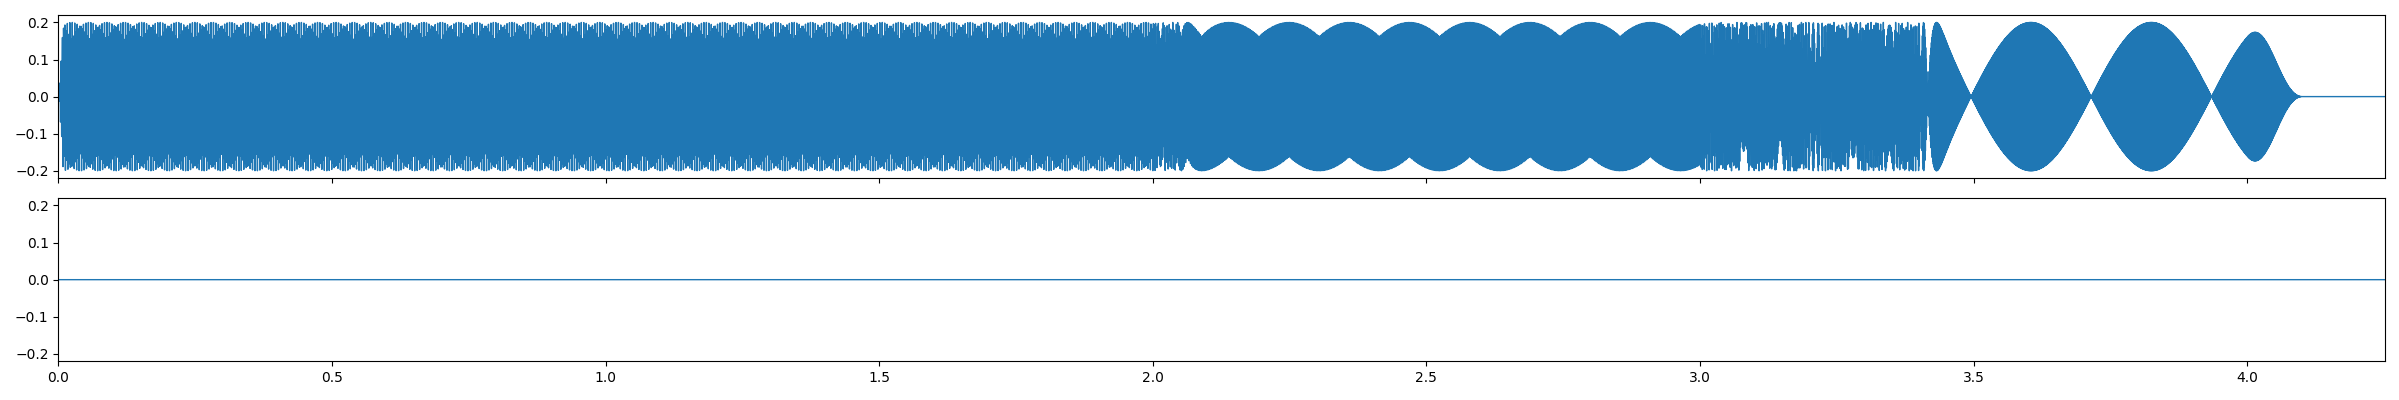

In [5]:
r = s.makeRenderer()
event = r.sched('sine', 0, 4, kfreq=442, iamp=0.2)
event.set(kfreq=800, delay=2)
event.automate("kfreq", (0, 1000, 0.1, 500, 0.2, 1000, 0.3, 500, 0.4, 1000), delay=3, overtake=True)
r.render('tmp/sine.wav', tail=0.25)


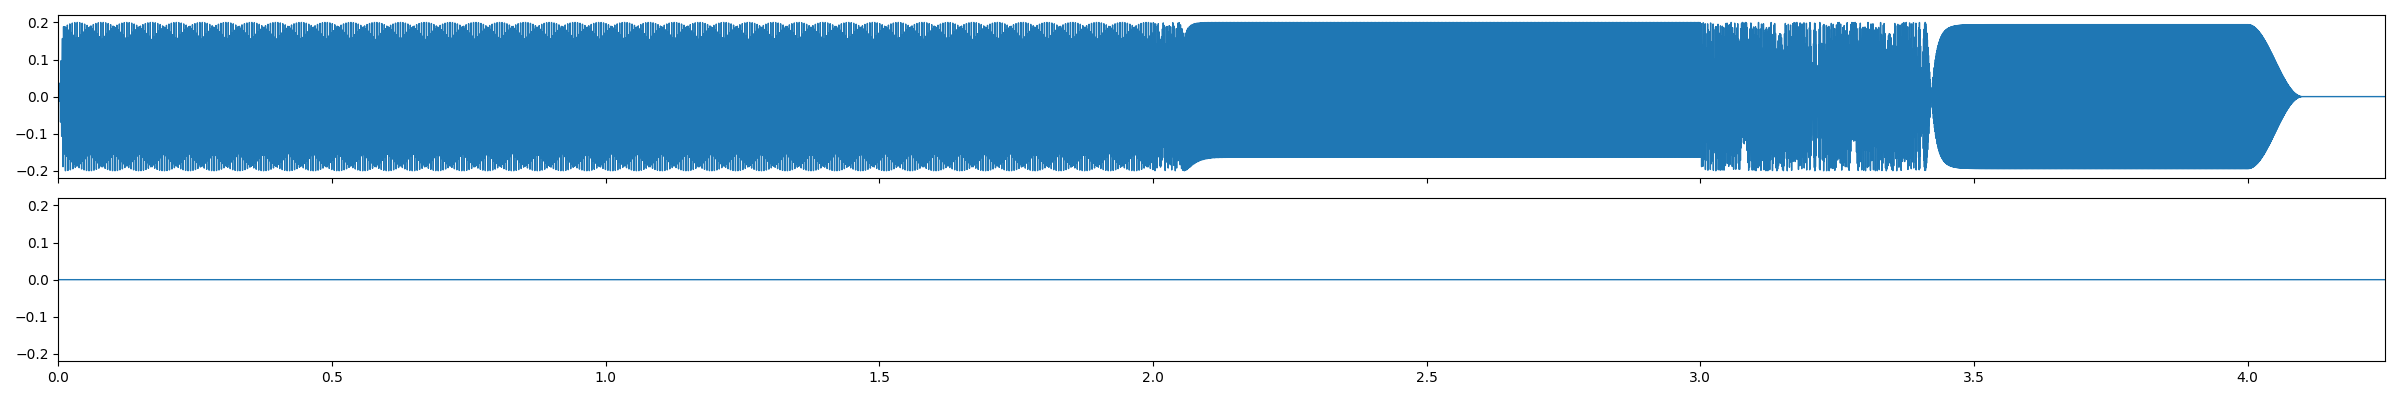

In [6]:
with s.rendering(tail=0.25) as r:
    event = s.sched('sine', 0, 4, kfreq=442, iamp=0.2)
    event.set(kfreq=800, delay=2)
    event.automate("kfreq", (0, 1000, 0.1, 500, 0.2, 1000, 0.3, 500, 0.4, 1000), delay=3, overtake=True)
r